In [1]:
# -*- coding: utf-8 -*-
#获取弹幕数据 弹幕 时间 弹幕时间（在电影中）
import jieba
import pandas as pd
import path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import shutil
from wordcloud import WordCloud,STOPWORDS

file0 = '../Data/Bilibili/Bilibili_Danmakus.csv'
csv = pd.read_csv(file0)
Danmakus  = csv['Danmakus']
Send_Time = csv['Time']
Dm_Time = csv['Dm_time']



In [2]:
#分析一 词云
Dm_s = ' '
for i in Danmakus:
    Dm_s =Dm_s + '/' + i    
default_mode = jieba.cut_for_search(Dm_s)
text = " ".join(default_mode)
SW = open('../Data/StopWords_HIT.txt',encoding='utf-8-sig')
Stop_Words = SW.read()
delet = ["了","啊","的","你","吧","我","是","这","好","就","这","不","都","吗","在","看","人",
         "也","有","还","呢","又","要","和","他","没","吃","被","不是","就是","什么","她","来",
         "能","真","呢","说","这个","真的","现在","这样","自己","还是","怎么","电影","那",
         "对","很","呀","太","哈哈","哈哈哈","没有","个","哈哈哈哈","一个","这么","得","想","让",
         "去","把","好看","哈","谁","上","啥","他们","真是","问题","豆腐","给","米","老婆","多","演技",
         "才","这种","那个","演","到","叫","过","李","组长","会","出来","时候","开始","这是","你们","么",
         "可以","卧槽","所以","不能","这女","有点","人家","做","里","啦","可","大","嘛","跟","着","咋","哪","写","像","啊啊啊"]
STOP_WORDS = Stop_Words.split('\n')+delet
stopwords = set(STOPWORDS)
stopwords.add("said")
for i in STOP_WORDS:
    stopwords.add(i)
wc = WordCloud(
    font_path='../Data/文泉驿正黑.ttf',
    background_color="white",
    max_words=500,
    width = 1920,
    height = 1080,
    relative_scaling = 0.8,
    prefer_horizontal = 1,
   # mask=mask,
    stopwords=stopwords
)

wc.generate(text)
Pic0_path = '../Result2/Pic0.png'
wc.to_file(Pic0_path)

text2 = text.split(" ")
for i in range(len(text2)-1,0,-1):
    if text2[i] == '\n':
        del(text2[i])
l2 = ''
l3 = ''
l4 = ''
l5 = ''
l6 = ''
l7 = ''
l8 = ''
for i in text2:
    if len(i) == 2:
        l2+=(i+' ')
    if len(i) == 3:
        l3+=(i+' ')
    if len(i) == 4:
        l4+=(i+' ')
    if len(i) == 5:
        l5+=(i+' ')
    if len(i) == 6:
        l6+=(i+' ')
    if len(i) == 7:
        l7+=(i+' ')
    if len(i) == 8:
        l8+=(i+' ')

p_dir = '../Result2/'
d = ['L2.png','L3.png','L4.png','L5.png','L6.png','L7.png','L8.png']
s = [l2,l3,l4,l5,l6,l7,l8]
for i in range(0,len(s),1):
    wc.generate(s[i])
    wc.to_file(p_dir+d[i])
    


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dell\AppData\Local\Temp\jieba.cache
Loading model cost 0.659 seconds.
Prefix dict has been built successfully.


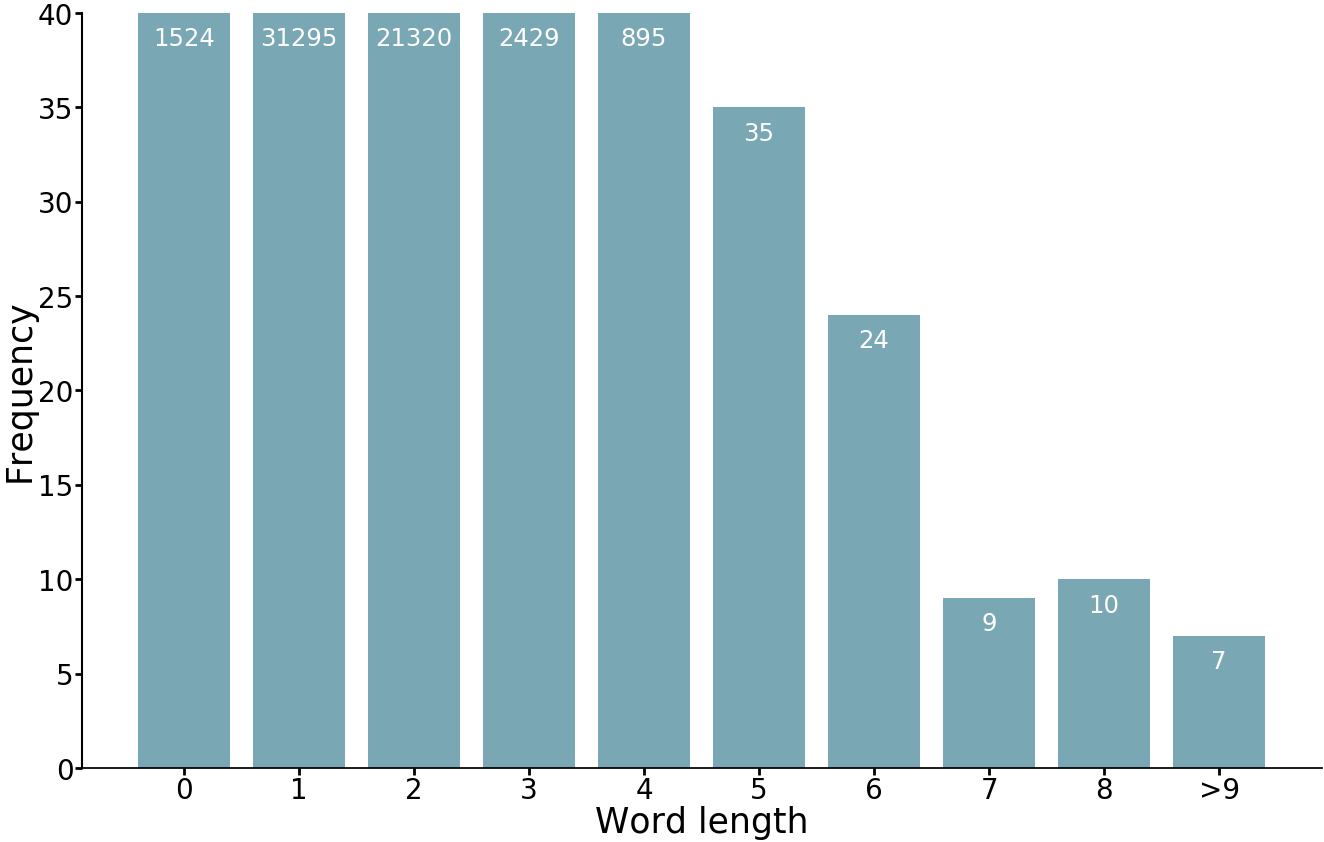

In [3]:
#分析二 词的频率分布
lens = [0]*30           #
for i in text2:
    for j in range(len(lens)):
        if(len(i)== j):
            lens[j]+=1
            
X = [i for i in range(10)]
Y = lens[0:10]
Y[9]=Y[9] + sum(lens[9:-1])
plt.figure(figsize=(64,40), dpi=25)
ax = plt.gca() #获取边框
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 
ax.spines['bottom'].set_linewidth(5)
ax.spines['left'].set_linewidth(6)
plt.xlabel("Word length",size = 100) 
plt.ylabel("Frequency",size = 100) 
plt.xticks(X,size = 80)
plt.yticks(size = 80)
plt.ylim(0,40)
plt.tick_params(direction="out",width = 8,length = 20)
new_ticks = ['0','1','2','3','4','5','6','7','8','>9']
plt.xticks(range(10),new_ticks)
for x,y in zip(X[0:5],Y[0:5]):
     plt.text(x, 38, '%.0f'%y, ha='center', va= 'bottom',fontsize=70,c = 'w')
for x,y in zip(X[5:10],Y[5:10]):
     plt.text(x, y%40-2, '%.0f'%y, ha='center', va= 'bottom',fontsize=70,c = 'w')
plt.bar(X,Y,alpha=0.65,width =0.8,color = '#32788a') #鱼师青 R50 G120 B138  #32788a 0.65透明度

plt.savefig("../Result2/Words_Distribution.png")
plt.show()    


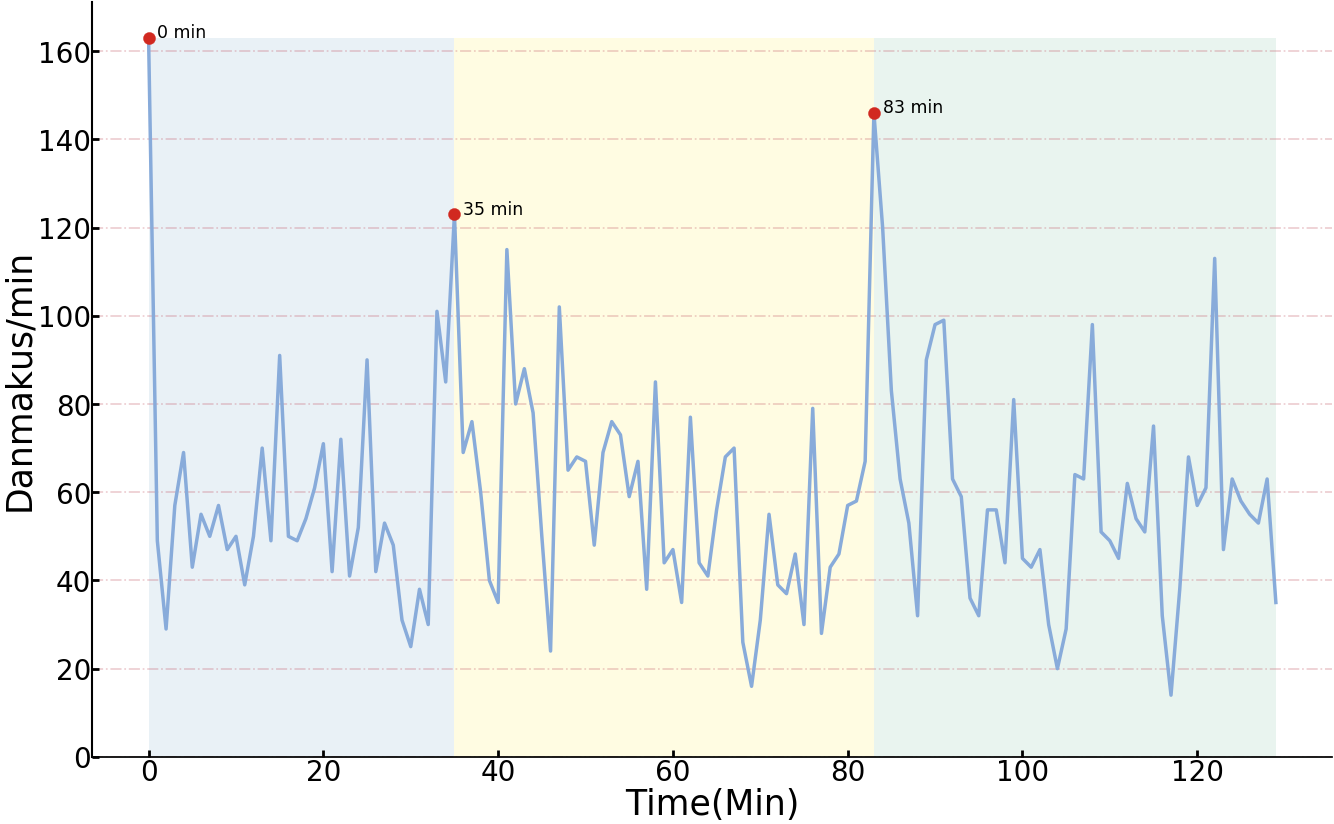

In [4]:
#分析三 弹幕时间分布 电影总时长 2：09：21 共7761s

#获得以秒为单位的时间序列
T_S = []
for T in Dm_Time:
    H = int(T[:1])
    M = int(T[2:4])
    S = int(T[5:7])
    T_S.append(H*60*60+M*60+S)
    
#间隔60s
#统计每60s内弹幕数
A = list(np.arange(0,7761,60)) 
A.append(7761)
S = []
for i in range(len(A)-1):
    s = []
    for j in T_S:
        if(j>=A[i] and j<A[i+1]):
            s.append(j)
    S.append(s)
L_S = []                #每60s内弹幕数

for i in S:
    L_S.append(len(i))
ss = []
X = range(len(L_S))
for i in range(len(L_S)):
    if L_S[i]> 120:
        ss.append(i)
py = [L_S[i] for i in ss]     
px = [X[i] for i in ss]
plt.figure(figsize=(64,40), dpi=25)
plt.tick_params(direction="in",width = 8,length = 20)
ax = plt.gca() #获取边框
ax.spines['bottom'].set_linewidth(5)
ax.spines['left'].set_linewidth(6)
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 
plt.xticks(size = 80)
plt.yticks(size = 80)
plt.xlabel("Time(Min)",size = 100) 
plt.ylabel("Danmakus/min",size = 100) 
plt.grid(axis="y",ls = '-.',color = '#c35c6a',linewidth = 5,alpha = 0.3)#美人祭 R195 G92 B106 
plt.bar(px[0]+(px[1]-px[0])/2,py[0],alpha=0.5,width =px[1]-px[0],color = '#d4e5ef') #月白 212 229 239
plt.bar(px[1]+(px[2]-px[1])/2,py[0],alpha=0.5,width =px[2]-px[1],color = '#fffbc7') #半见 255 251 199
plt.bar(px[2]+(X[-1]-px[2])/2,py[0],alpha=0.5,width =X[-1]-px[2],color = '#d5ebe1') #天缥 2123 235 225
plt.plot(X,L_S,linewidth = 10,color = '#88abda')#窃蓝   R136 G171 B218
plt.plot(px,py,'bo',ms = 35,color = '#d12920') #银朱 209 41 32
plt.text(px[0]+1, py[0], str(px[0])+' min',size = 50)
plt.text(px[1]+1, py[1], str(px[1])+' min',size = 50)
plt.text(px[2]+1, py[2], str(px[2])+' min',size = 50)
plt.savefig("../Result2/DanmakusPerMin.png")
plt.show() 